In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack
import fitsio
# from astropy.io import fits

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [22]:
sweep_dir = '/Volumes/WD Elements/dr9/south/sweep/9.0'

columns = ['TYPE', 'RA', 'DEC', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 'FLUX_IVAR_G', 'FLUX_IVAR_R', 'FLUX_IVAR_Z', 
           'NOBS_G', 'NOBS_R', 'NOBS_Z', 'FIBERFLUX_G', 'FIBERFLUX_R', 'FIBERFLUX_Z', 'MASKBITS']

In [23]:
cat = Table(fitsio.read('/Volumes/WD Elements/dr9/south/sweep/9.0/sweep-120p015-130p020.fits', columns=columns))

min_nobs = 1
mask = (cat['NOBS_G']>=min_nobs) & (cat['NOBS_R']>=min_nobs) & (cat['NOBS_Z']>=min_nobs)
cat = cat[mask]

maskbits = [1, 5, 6, 7, 12, 13]
mask_clean = np.ones(len(cat), dtype=bool)
for bit in maskbits:
    mask_clean &= (cat['MASKBITS'] & 2**bit)==0
print(np.sum(~mask_clean)/len(mask_clean))
cat = cat[mask_clean]
print(len(cat))

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    cat['gmag'] = 22.5 - 2.5*np.log10(cat['FLUX_G'])
    cat['rmag'] = 22.5 - 2.5*np.log10(cat['FLUX_R'])
    cat['zmag'] = 22.5 - 2.5*np.log10(cat['FLUX_Z'])
    cat['gfibermag'] = 22.5 - 2.5*np.log10(cat['FIBERFLUX_G'])
    cat['rfibermag'] = 22.5 - 2.5*np.log10(cat['FIBERFLUX_R'])
    cat['zfibermag'] = 22.5 - 2.5*np.log10(cat['FIBERFLUX_Z'])

0.017991095277020093
4022116


42


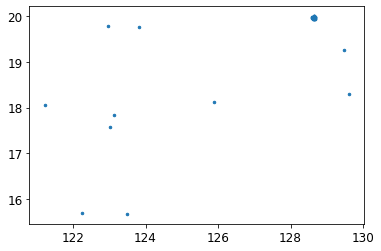

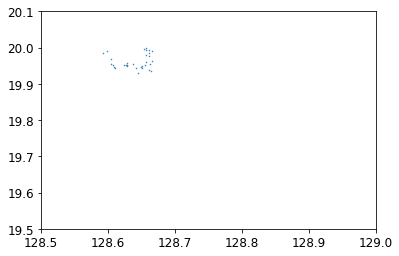

In [31]:
mask = (cat['gmag']<22.5) & (cat['zmag']<21.0) & (cat['FLUX_R']<=0)
print(np.sum(mask))

plt.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=5)
plt.show()

plt.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=1)
plt.axis([128.5, 129, 19.5, 20.1])
plt.show()

42


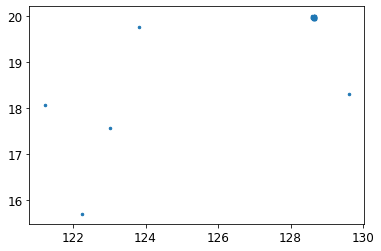

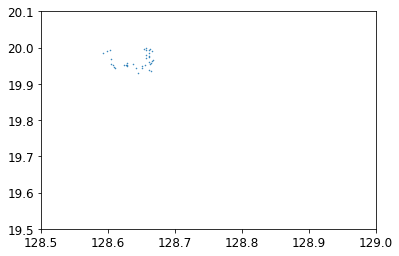

In [32]:
mask = (cat['gfibermag']<23.5) & (cat['zfibermag']<22.0) & (cat['FLUX_R']<=0)
print(np.sum(mask))

plt.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=5)
plt.show()

plt.plot(cat['RA'][mask], cat['DEC'][mask], '.', ms=1)
plt.axis([128.5, 129, 19.5, 20.1])
plt.show()

--------

In [34]:
columns = ['TYPE', 'RA', 'DEC', 'FLUX_G', 'FLUX_R', 'FLUX_Z', 
           'NOBS_G', 'NOBS_R', 'NOBS_Z', 'FIBERFLUX_G', 'FIBERFLUX_R', 'FIBERFLUX_Z', 'MASKBITS']

In [37]:
cat_stack = []

fn_list = glob.glob(os.path.join(sweep_dir, '*.fits'))
for index, fn in enumerate(fn_list):
    
    tmp = fitsio.read(fn, columns=['FLUX_R'])
    idx = np.where(tmp['FLUX_R']<=0)[0]
    if len(idx)==0:
        print(os.path.basename(fn), 0, '{}/{}'.format(index, len(fn_list)))

    cat = Table(fitsio.read(fn, columns=columns, rows=idx))

    min_nobs = 1
    mask = (cat['NOBS_G']>=min_nobs) & (cat['NOBS_R']>=min_nobs) & (cat['NOBS_Z']>=min_nobs)
    cat = cat[mask]

    maskbits = [1, 5, 6, 7, 12, 13]
    mask_clean = np.ones(len(cat), dtype=bool)
    for bit in maskbits:
        mask_clean &= (cat['MASKBITS'] & 2**bit)==0
    # print(np.sum(~mask_clean)/len(mask_clean))
    cat = cat[mask_clean]
    # print(len(cat))

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        cat['gmag'] = 22.5 - 2.5*np.log10(cat['FLUX_G'])
        cat['rmag'] = 22.5 - 2.5*np.log10(cat['FLUX_R'])
        cat['zmag'] = 22.5 - 2.5*np.log10(cat['FLUX_Z'])
        cat['gfibermag'] = 22.5 - 2.5*np.log10(cat['FIBERFLUX_G'])
        cat['rfibermag'] = 22.5 - 2.5*np.log10(cat['FIBERFLUX_R'])
        cat['zfibermag'] = 22.5 - 2.5*np.log10(cat['FIBERFLUX_Z'])
        
    # mask = (cat['gmag']<22.5) & (cat['zmag']<21.0)
    mask = (cat['gfibermag']<23.5) & (cat['zfibermag']<22.0)
    print(os.path.basename(fn), np.sum(mask), '{}/{}'.format(index, len(fn_list)))

    if np.sum(mask)>0:
        cat = cat[mask]
        cat_stack.append(cat)

sweep-000m005-010p000.fits 1 0/455
sweep-000m010-010m005.fits 1 1/455
sweep-000m015-010m010.fits 14 2/455
sweep-000m020-010m015.fits 0 3/455
sweep-000m025-010m020.fits 0 4/455
sweep-000m030-010m025.fits 0 5/455
sweep-000m035-010m030.fits 3 6/455
sweep-000m040-010m035.fits 3 7/455
sweep-000m045-010m040.fits 6 8/455
sweep-000m050-010m045.fits 4 9/455
sweep-000m055-010m050.fits 3 10/455
sweep-000m060-010m055.fits 1 11/455
sweep-000m065-010m060.fits 1 12/455
sweep-000m070-010m065.fits 1 13/455
sweep-000p000-010p005.fits 0 14/455
sweep-000p005-010p010.fits 3 15/455
sweep-000p010-010p015.fits 5 16/455
sweep-000p015-010p020.fits 6 17/455
sweep-000p020-010p025.fits 16 18/455
sweep-000p025-010p030.fits 14 19/455
sweep-000p030-010p035.fits 12 20/455
sweep-010m005-020p000.fits 1 21/455
sweep-010m010-020m005.fits 13 22/455
sweep-010m015-020m010.fits 15 23/455
sweep-010m020-020m015.fits 3 24/455
sweep-010m025-020m020.fits 0 25/455
sweep-010m030-020m025.fits 1 26/455
sweep-010m035-020m030.fits 1 27/

sweep-150m030-160m025.fits 3 224/455
sweep-150m035-160m030.fits 0 225/455
sweep-150p000-160p005.fits 5 226/455
sweep-150p005-160p010.fits 8 227/455
sweep-150p010-160p015.fits 0 228/455
sweep-150p015-160p020.fits 5 229/455
sweep-150p020-160p025.fits 1 230/455
sweep-150p025-160p030.fits 5 231/455
sweep-150p030-160p035.fits 6 232/455
sweep-150p035-160p040.fits 0 233/455
sweep-160m005-170p000.fits 2 234/455
sweep-160m010-170m005.fits 5 235/455
sweep-160m015-170m010.fits 0 236/455
sweep-160m025-170m020.fits 0 237/455
sweep-160m030-170m025.fits 7 238/455
sweep-160m035-170m030.fits 0 239/455
sweep-160p000-170p005.fits 5 240/455
sweep-160p005-170p010.fits 4 241/455
sweep-160p010-170p015.fits 6 242/455
sweep-160p015-170p020.fits 7 243/455
sweep-160p020-170p025.fits 8 244/455
sweep-160p025-170p030.fits 2 245/455
sweep-160p030-170p035.fits 2 246/455
sweep-170m005-180p000.fits 6 247/455
sweep-170m010-180m005.fits 2 248/455
sweep-170m030-180m025.fits 0 249/455
sweep-170m035-180m030.fits 0 250/455
s

sweep-350m060-360m055.fits 6 444/455
sweep-350m065-360m060.fits 4 445/455
sweep-350m070-360m065.fits 2 446/455
sweep-350p000-360p005.fits 15 447/455
sweep-350p005-360p010.fits 193 448/455
sweep-350p010-360p015.fits 257 449/455
sweep-350p015-360p020.fits 261 450/455
sweep-350p020-360p025.fits 41 451/455
sweep-350p025-360p030.fits 145 452/455
sweep-350p030-360p035.fits 339 453/455
sweep-350p035-360p040.fits 0 454/455


In [39]:
cat_stack = vstack(cat_stack)
cat_stack.write('/Users/rongpu/Documents/Data/temp/dr9_south_r_band_outliers.fits')